# Lista de exercícios 1
## EX-1

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

In [2]:
# Parâmetros do problema:
d = 5                             # dimensão do espaço de vetores de entrada
x = np.random.random(d) - 0.5     # vetor de entrada
w = np.random.random(d)           # vetor de pesos
b = np.random.random(1) - 0.5     # escalar de bias

def neuronEval(x, w, b=None):
    """
    Funcao que avalia a resposta de um neuronio.
    """
    if (b is not None):
        x = np.append(x, 1)
        w = np.append(w, b)
    y = np.sign(np.dot(x,w))
    if y == 0:
        y = -1
    return y

print 'Vetor de entrada:', x
print 'Vetor de pesos:', w
print 'Escalar bias:', b
print '\nResultado do neuronio:', neuronEval(x, w, b)


Vetor de entrada: [-0.48786366 -0.24897696  0.49037041  0.14550691  0.29803937]
Vetor de pesos: [ 0.99060017  0.82344797  0.51528104  0.24628002  0.67098281]
Escalar bias: [-0.21732555]

Resultado do neuronio: -1.0


## EX-2

In [4]:
def plotSepPlane(df, w, x_i=None):
    ax = df.plot(kind='scatter', x='x1', y='x2',
                 c=df_train.y.map(lambda x: 'blue' if (x > 0) else 'red'),
                 s=50, marker='o',
                 #marker=df_train.y.map(lambda x: '+' if (x > 0) else '-')
                )
    if 'right_answer' in df.columns:
        df.plot(ax=ax, kind='scatter', x='x1', y='x2', c='none', s=100,
                marker='o',
                edgecolors=df.right_answer.map(lambda x: 'blue' if (x > 0) else 'red'))
    if not (x_i is None):
        plt.scatter(x_i[0], x_i[1], marker='o', s=200, c='none', edgecolors='green')
    if not (w is None):
        x1 = np.linspace(df.x1.min(), df.x1.max(), 2)
        if (w[1] == 0) and (w[0] != 0):
            x2 = np.linspace(df.x2.min(), df.x2.max(), 2)
            x1 = np.ones(2) * -w[2]/w[0]
        elif (w[0] == 0) and (w[1] != 0):
            x2 = np.ones(2) * -w[2]/w[1]
        elif (w[0] == 0) and (w[1] == 0):
            x1 = [0]
            x2 = [0]
        else:
            x2 = (-w[0]*x1 - w[2])/w[1]
        ax.plot(x1, x2, 'r')
    plt.show()


,x1,x2,y
0,1.515431,2.161787,1.0
1,1.617935,1.000036,1.0
2,1.001275,0.126902,1.0
3,0.937580,1.822932,1.0
4,0.760835,2.182637,1.0
5,1.240531,0.405724,1.0
6,0.437647,0.731466,1.0
7,3.646461,1.308864,1.0
8,0.299121,-0.039751,1.0
9,-0.794757,1.497402,1.0


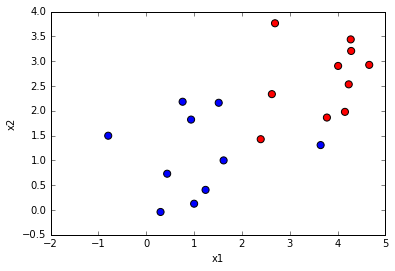


------------
Rodada #0

> x_i: [ 0.29912074 -0.03975136  1.        ]
> w_i: [ 0.44547989  0.39939411  1.        ]
> y_i: 1.0
> y_hat: 1.0


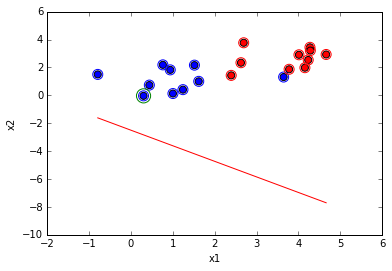


> x_i: [ 2.39375131  1.42744696  1.        ]
> w_i: [ 0.44547989  0.39939411  1.        ]
> y_i: -1.0
> y_hat: 1.0


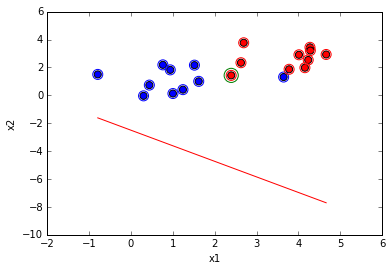

**********Atualizando pesos:
> w_i: [ 0.20610476  0.25664942  0.9       ]


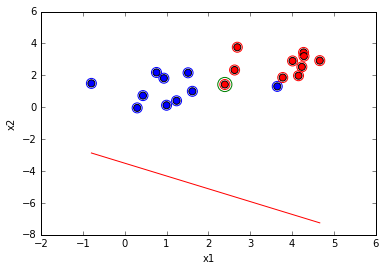


> x_i: [ 3.77764453  1.86397053  1.        ]
> w_i: [ 0.20610476  0.25664942  0.9       ]
> y_i: -1.0
> y_hat: 1.0


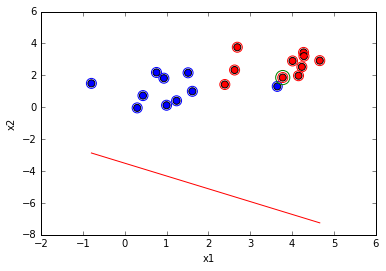

**********Atualizando pesos:
> w_i: [-0.17165969  0.07025236  0.8       ]


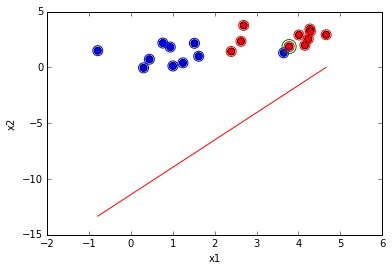


> x_i: [ 1.51543083  2.16178704  1.        ]
> w_i: [-0.17165969  0.07025236  0.8       ]
> y_i: 1.0
> y_hat: 1.0


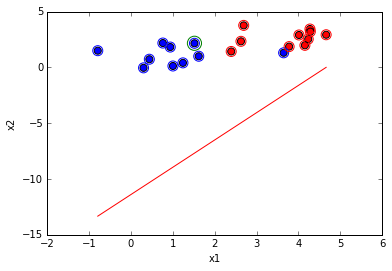


> x_i: [ 4.28463219  3.2065183   1.        ]
> w_i: [-0.17165969  0.07025236  0.8       ]
> y_i: -1.0
> y_hat: 1.0


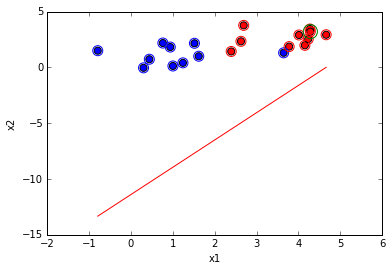

**********Atualizando pesos:
> w_i: [-0.60012291 -0.25039947  0.7       ]


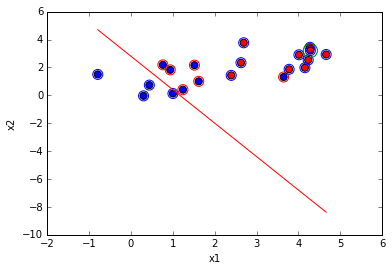


> x_i: [ 1.24053101  0.40572424  1.        ]
> w_i: [-0.60012291 -0.25039947  0.7       ]
> y_i: 1.0
> y_hat: -1.0


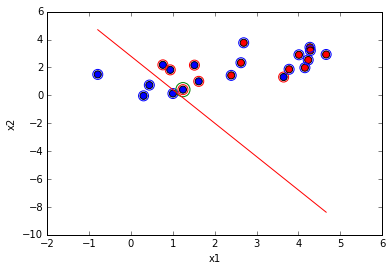

**********Atualizando pesos:
> w_i: [-0.47606981 -0.20982704  0.8       ]


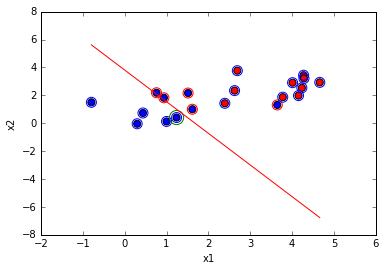


> x_i: [ 0.43764737  0.73146582  1.        ]
> w_i: [-0.47606981 -0.20982704  0.8       ]
> y_i: 1.0
> y_hat: 1.0


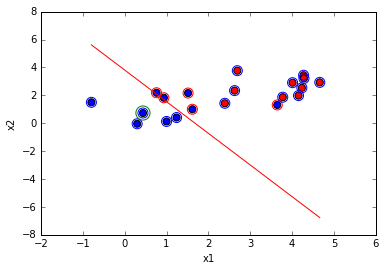


> x_i: [ 2.69224117  3.76487271  1.        ]
> w_i: [-0.47606981 -0.20982704  0.8       ]
> y_i: -1.0
> y_hat: -1.0


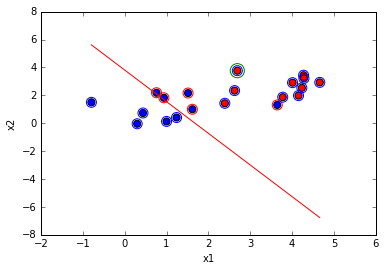


> x_i: [ 2.62684775  2.33609319  1.        ]
> w_i: [-0.47606981 -0.20982704  0.8       ]
> y_i: -1.0
> y_hat: -1.0


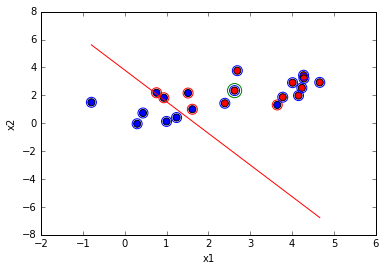


> x_i: [ 0.76083516  2.1826372   1.        ]
> w_i: [-0.47606981 -0.20982704  0.8       ]
> y_i: 1.0
> y_hat: -1.0


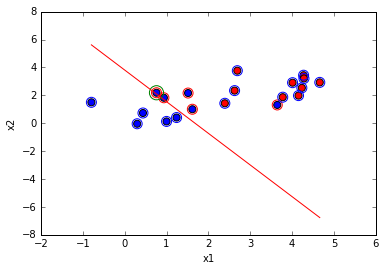

**********Atualizando pesos:
> w_i: [-0.39998629  0.00843668  0.9       ]


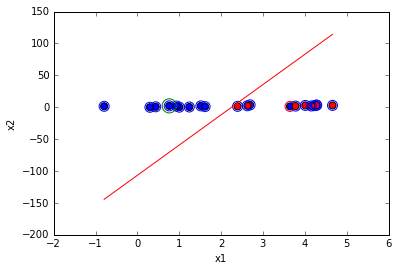


> x_i: [ 4.15458858  1.97846497  1.        ]
> w_i: [-0.39998629  0.00843668  0.9       ]
> y_i: -1.0
> y_hat: -1.0


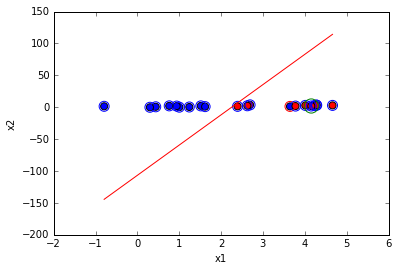


> x_i: [ 0.93757996  1.82293187  1.        ]
> w_i: [-0.39998629  0.00843668  0.9       ]
> y_i: 1.0
> y_hat: 1.0


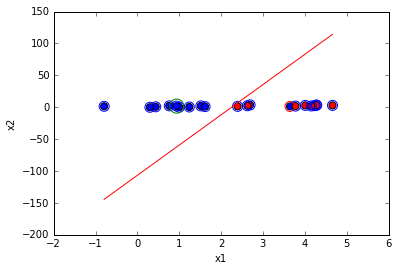


> x_i: [-0.79475726  1.49740203  1.        ]
> w_i: [-0.39998629  0.00843668  0.9       ]
> y_i: 1.0
> y_hat: 1.0


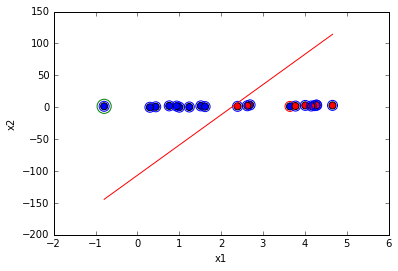


> x_i: [ 3.64646131  1.30886413  1.        ]
> w_i: [-0.39998629  0.00843668  0.9       ]
> y_i: 1.0
> y_hat: -1.0


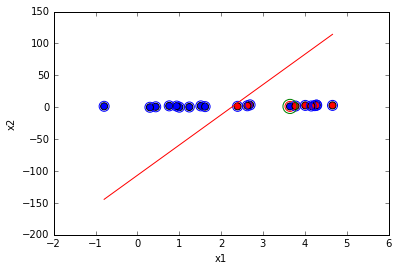

**********Atualizando pesos:
> w_i: [-0.03534016  0.13932309  1.        ]


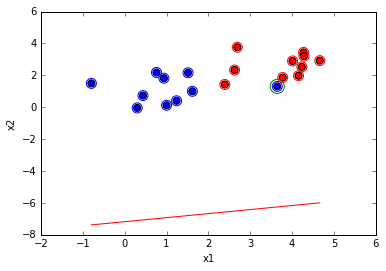


> x_i: [ 4.23396486  2.53332537  1.        ]
> w_i: [-0.03534016  0.13932309  1.        ]
> y_i: -1.0
> y_hat: 1.0


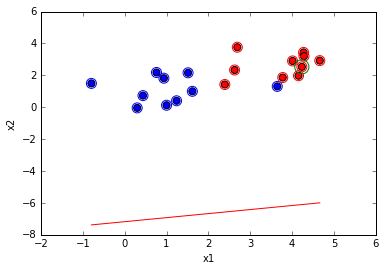

**********Atualizando pesos:
> w_i: [-0.45873665 -0.11400944  0.9       ]


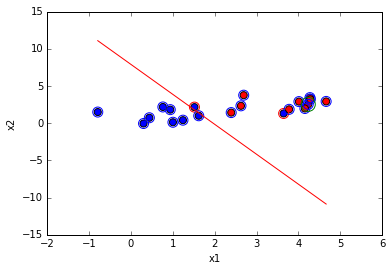


> x_i: [ 4.66242733  2.9258182   1.        ]
> w_i: [-0.45873665 -0.11400944  0.9       ]
> y_i: -1.0
> y_hat: -1.0


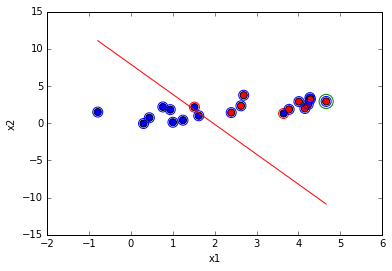


> x_i: [ 1.00127479  0.12690198  1.        ]
> w_i: [-0.45873665 -0.11400944  0.9       ]
> y_i: 1.0
> y_hat: 1.0


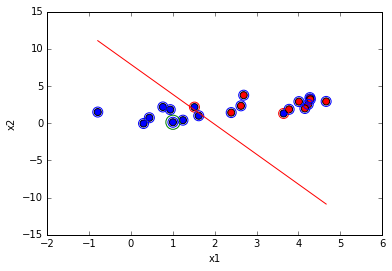


> x_i: [ 4.27570748  3.43935108  1.        ]
> w_i: [-0.45873665 -0.11400944  0.9       ]
> y_i: -1.0
> y_hat: -1.0


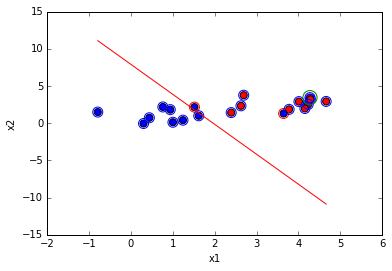


> x_i: [ 4.01208085  2.90457075  1.        ]
> w_i: [-0.45873665 -0.11400944  0.9       ]
> y_i: -1.0
> y_hat: -1.0


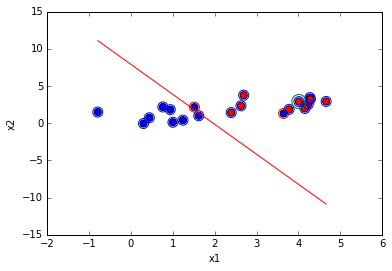


> x_i: [ 1.61793452  1.00003645  1.        ]
> w_i: [-0.45873665 -0.11400944  0.9       ]
> y_i: 1.0
> y_hat: 1.0


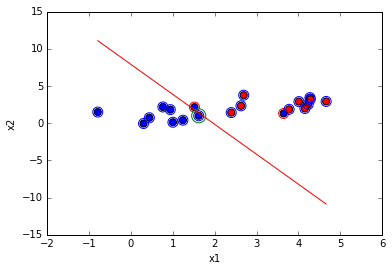

Vetor de pesos: [-0.45873665 -0.11400944  0.9       ]


,x1,x2,y,b,y_hat,right_answer
0,1.515431,2.161787,1.0,1,-1.0,-1.0
1,1.617935,1.000036,1.0,1,1.0,1.0
2,1.001275,0.126902,1.0,1,1.0,1.0
3,0.937580,1.822932,1.0,1,1.0,1.0
4,0.760835,2.182637,1.0,1,1.0,1.0
5,1.240531,0.405724,1.0,1,1.0,1.0
6,0.437647,0.731466,1.0,1,1.0,1.0
7,3.646461,1.308864,1.0,1,-1.0,-1.0
8,0.299121,-0.039751,1.0,1,1.0,1.0
9,-0.794757,1.497402,1.0,1,1.0,1.0


In [5]:
## Conjunto de treinamento

train_case = 'w'
n_samples  = 10

if train_case == 'AND':
    # Conjunto para o caso AND
    df_train = pd.DataFrame({'x1': [1,1,0,0], 'x2': [1,0,1,0], 'y': [1,-1,-1,-1]})
    print 'Caso "AND"'
    display(df_train)

elif train_case == 'XOR':
    # Conjunto para o caso AND
    df_train = pd.DataFrame({'x1': [1,1,0,0], 'x2': [1,0,1,0], 'y': [-1,1,1,-1]})
    print 'Caso "AND"'
    display(df_train)
    
elif train_case == 'XOR':
    # Conjunto para o caso OR
    df_train = pd.DataFrame({'x1': [1,1,0,0], 'x2': [1,0,1,0], 'y': [1,1,1,-1]})
    print 'Caso "OR"'
    display(df_train)
    
else:
    mu1 = 1
    mu2 = 1
    sigma1 = 1
    sigma2 = 1
    x1 = sigma1*np.random.randn(n_samples) + mu1
    x2 = sigma2*np.random.randn(n_samples) + mu2
    df_train = pd.DataFrame({'x1': x1, 'x2': x2})
    df_train['y'] = 1
    
    mu1 = 3
    mu2 = 3
    sigma1 = 1
    sigma2 = 1
    x1 = sigma1*np.random.randn(n_samples) + mu1
    x2 = sigma2*np.random.randn(n_samples) + mu2
    df_train = df_train.append(pd.DataFrame({'x1': x1, 'x2': x2}), ignore_index=True)
    df_train.ix[df_train.y.isnull(), 'y'] = -1
    

# Funcao que treina o perceptron
max_epoch = 2
d = 2

import pdb
def evalPerceptron(df, w, b=None):
    #pdb.set_trace()
    """
    Funcao que avalia a resposta de um neuronio para varias entradas.
    """
    if (b is not None) and ('b' not in df.columns):
        df['b'] = 1
        w = np.append(w, b)
    y = np.sign(np.inner(df.drop('y', axis=1), w))
    df['y_hat'] = y
    df['right_answer'] = df.y_hat*df.y
    return df

def trainPerceptron(df, max_epoch=1000, d='infer', learning_rate=0.2,
                    w_init=None, b_init=None, debug=False):
    """
    Funcao que treina um perceptron, realizando no maximo (max_epoch) ciclos.
    """
    if d == 'infer':
        d = df.shape[1] - 1
    if (w_init is None):
        w_init = np.zeros(d)
    if (b_init is None):
        b_init = np.array([1])

    w_i = np.append(w_init, b_init)
    d = d + 1
    df['b'] = 1
    
    for i_epoch in range(max_epoch):
        if debug: print '\n------------\nRodada #%s' % i_epoch
        for ni, x_i in df.sample(df.shape[0]).iterrows():
            y_i = x_i.pop('y')
            x_i = x_i.values
            y_hat = neuronEval(x_i, w_i)
            if debug:
                print '\n> x_i:', x_i
                print '> w_i:', w_i
                print '> y_i:', y_i
                print '> y_hat:', y_hat
                df1 = evalPerceptron(df.copy(), w_i, b=None)
                plotSepPlane(df1, w_i, x_i=x_i)     
            if y_i*y_hat < 0:
                w_i = w_i + learning_rate*y_i*x_i
                if debug:
                    print '**********Atualizando pesos:\n> w_i:', w_i
                    df1 = evalPerceptron(df.copy(), w_i, b=None)
                    plotSepPlane(df1, w_i, x_i=x_i)     
              
    print 'Vetor de pesos:', w_i
    return w_i
    
display(df_train)
plotSepPlane(df_train, None)

w = trainPerceptron(df_train, max_epoch=1, w_init=(np.random.random(2) - 0.5),
                    learning_rate=0.1, d='infer', debug=True)
y = evalPerceptron(df_train, w)
display(y)

In [6]:
"""
===========
MovieWriter
===========

This example uses a MovieWriter directly to grab individual frames and write
them to a file. This avoids any event loop integration, but has the advantage
of working with even the Agg backend. This is not recommended for use in an
interactive setting.

"""
# -*- noplot -*-

import numpy as np
import matplotlib
matplotlib.use("Agg")
import matplotlib.pyplot as plt
import matplotlib.animation as manimation

FFMpegWriter = manimation.writers['ffmpeg']
metadata = dict(title='Movie Test', artist='Matplotlib',
                comment='Movie support!')
writer = FFMpegWriter(fps=15, metadata=metadata)

fig = plt.figure()
l, = plt.plot([], [], 'k-o')

plt.xlim(-5, 5)
plt.ylim(-5, 5)

x0, y0 = 0, 0

with writer.saving(fig, "writer_test.mp4", 100):
    for i in range(100):
        x0 += 0.1 * np.random.randn()
        y0 += 0.1 * np.random.randn()
        l.set_data(x0, y0)
        writer.grab_frame()

C:\Users\gusta\Anaconda2\lib\site-packages\matplotlib\__init__.py:1350: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


RuntimeError: No MovieWriters available!